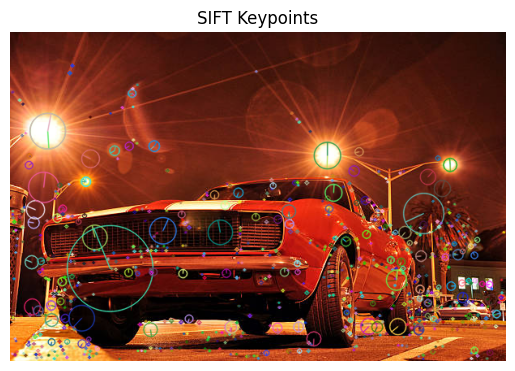

In [1]:
import cv2
import matplotlib.pyplot as plt

# Read image and convert to grayscale
img = cv2.imread('img2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create SIFT object
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw keypoints
img_sift = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show image
plt.imshow(cv2.cvtColor(img_sift, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.axis('off')
plt.show()


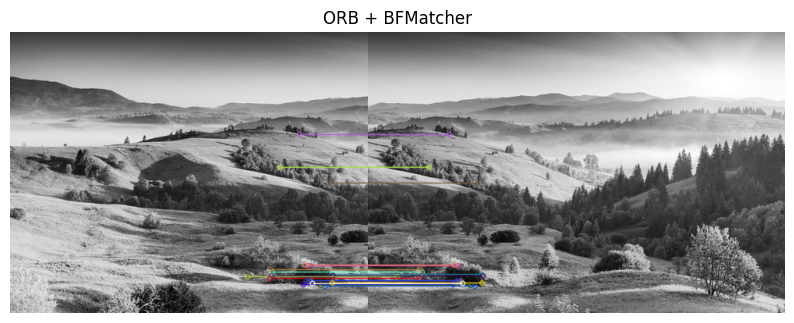

In [2]:
# Load two images
img1 = cv2.imread('img4.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('img5.jpg', cv2.IMREAD_GRAYSCALE)

# ORB detector
orb = cv2.ORB_create()

# Find keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Brute-Force matcher with Hamming distance
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

# Draw top 20 matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:20], None, flags=2)

# Display matches
plt.figure(figsize=(10, 5))
plt.imshow(img_matches)
plt.title('ORB + BFMatcher')
plt.axis('off')
plt.show()


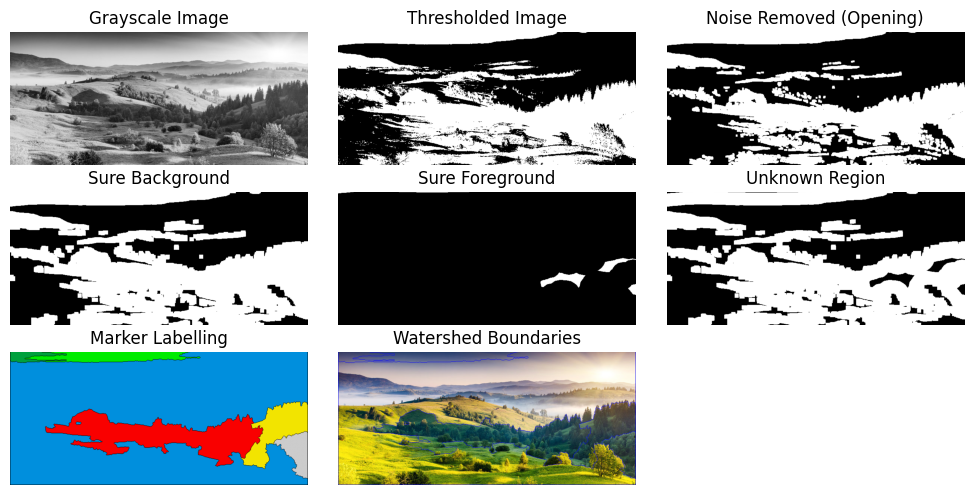

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('img3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 1: Apply Threshold
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Step 2: Noise Removal using Morphological Operations
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Step 3: Sure Background Area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Step 4: Sure Foreground Area using Distance Transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Step 5: Unknown Region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Step 6: Marker Labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add 1 to all labels so that background is 1, not 0
markers = markers + 1

# Mark the unknown region as 0
markers[unknown == 255] = 0

# Step 7: Apply Watershed
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]  # mark boundaries in red

# Step 8: Show Results

# Display the Original Grayscale Image
plt.figure(figsize=(10, 5))
plt.subplot(3, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Display Thresholded Image
plt.subplot(3, 3, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

# Display Opening (Noise Removal)
plt.subplot(3, 3, 3)
plt.imshow(opening, cmap='gray')
plt.title('Noise Removed (Opening)')
plt.axis('off')

# Display Sure Background Area
plt.subplot(3, 3, 4)
plt.imshow(sure_bg, cmap='gray')
plt.title('Sure Background')
plt.axis('off')

# Display Sure Foreground Area
plt.subplot(3, 3, 5)
plt.imshow(sure_fg, cmap='gray')
plt.title('Sure Foreground')
plt.axis('off')

# Display Unknown Region
plt.subplot(3, 3, 6)
plt.imshow(unknown, cmap='gray')
plt.title('Unknown Region')
plt.axis('off')

# Display Marker Labelling (Connected Components)
plt.subplot(3, 3, 7)
plt.imshow(markers, cmap='nipy_spectral')
plt.title('Marker Labelling')
plt.axis('off')

# Display Final Image with Watershed Boundaries
plt.subplot(3, 3, 8)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Watershed Boundaries')
plt.axis('off')

plt.tight_layout()
plt.show()
